In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64 #batch size

In [3]:
path = untar_data(URLs.PETS)/'images'
path

PosixPath('/Users/elvingomez/.fastai/data/oxford-iiit-pet/images')

## Data Augmentation

In [4]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4, 
                      p_affine=1., p_lighting=1.)

In [5]:
doc(get_transforms) #taking a look at the docs

In [6]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

In [7]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.label_from_re(r'([^/]+)_\d+.jpg$')
            .transform(tfms, size=size, padding_mode=padding_mode)
            .databunch(bs=bs)
            .normalize(imagenet_stats))

In [8]:
data = get_data(224, bs, 'zeros')
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Birman
Path: /Users/elvingomez/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pomeranian,Persian,Siamese,Egyptian_Mau
Path: /Users/elvingomez/.fastai/data/oxford-iiit-pet/images;

Test: None

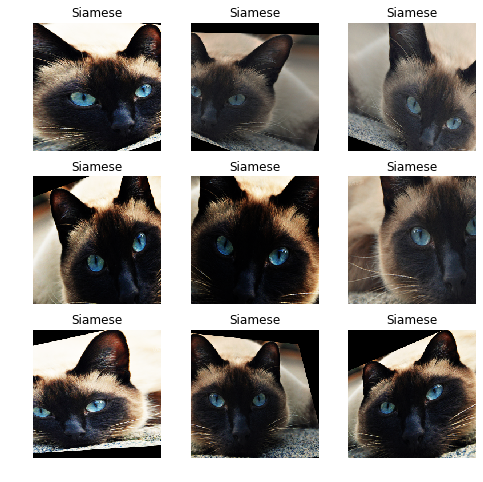

In [9]:
def _plot(i, j, ax):
    x, y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

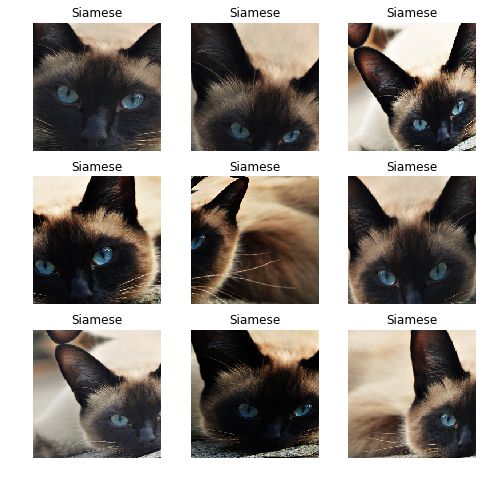

In [10]:
data = get_data(224,bs)
plot_multi(_plot, 3, 3, figsize=(8,8))

## Train a model

In [13]:
gc.collect() #use memory
learn = cnn_learner(data, models.resnet34, metrics=error_rate, bn_final=True)

In [14]:
learn.fit_one_cycle(3, slice(1e-2), pct_start=0.8)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: DataLoader worker (pid 30742) is killed by signal: Unknown signal: 0. 